Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
crop_data = pd.read_csv('https://raw.githubusercontent.com/Hanzo-97/Crop-Csv/refs/heads/main/Crop_recommendation.csv')

In [3]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop_data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
print("Shape of dataset:", crop_data.shape)
print("\nMissing values:\n", crop_data.isnull().sum())

Shape of dataset: (2200, 8)

Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [7]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Check for data imbalance

In [12]:
crop_data['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


Crop type distribution

<ipython-input-10-7cca84c8a134>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=crop_data, order=crop_data['label'].value_counts().index, palette='viridis')


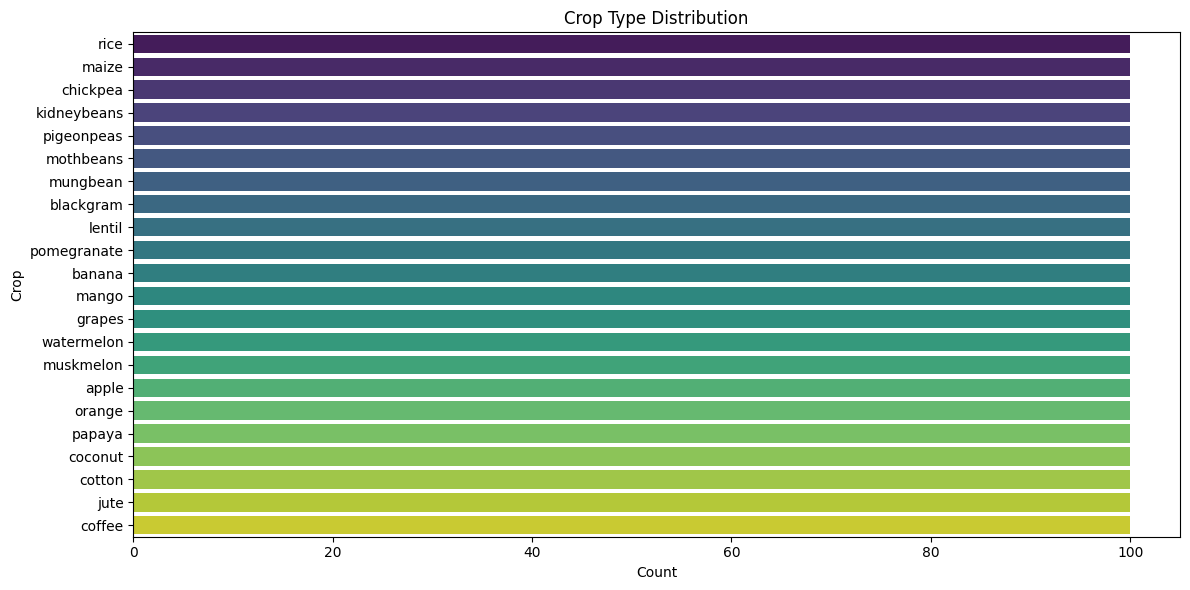

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=crop_data, order=crop_data['label'].value_counts().index, palette='viridis')
plt.title("Crop Type Distribution")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

Correlation Heatmap Analysis

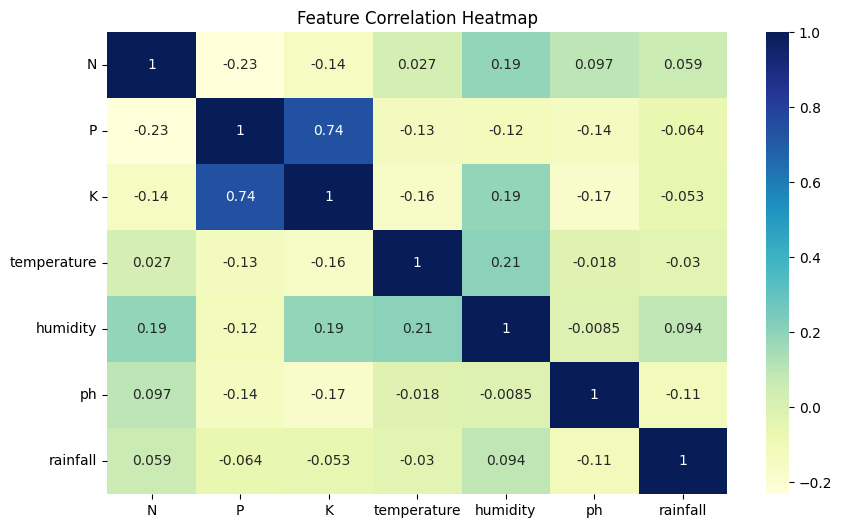

In [15]:
corr = crop_data.drop('label', axis=1).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()

Feature Selection

In [16]:
X = crop_data.drop('label', axis=1)
y = crop_data['label']

In [17]:
print(X)
print(y)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


Splitting And Training

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
print("Testing samples:", X_test.shape[0])
print("Training samples:", X_train.shape[0])


Training samples: 1760
Testing samples: 440


Model

Random Forest

In [23]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

Model Evaluation

In [26]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9977272727272727


In [27]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        22
   blackgram       1.00      0.93      0.96        14
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        20
        jute       1.00      1.00      1.00        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.97        19
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        18
  

Cross - Validation for stability and avoid overfitting

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100)

# Perform 5-fold cross-validation (you can increase folds if you want)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of accuracy:", np.std(cv_scores))

Cross-validation accuracy scores for each fold: [0.99772727 0.99318182 0.99545455 0.99545455 0.99090909]
Mean cross-validation accuracy: 0.9945454545454545
Standard deviation of accuracy: 0.0023177361425421525
